In [19]:
# Use this cell to regroup all your imports
## Classic Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats

# Widgets import
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.datasets import make_blobs


# SKlearn model Import
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge

#Trees and boosting import 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Unsupervised cluster model
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


#Curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Scaler import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import get_scorer_names

#Pipeline import
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import pickle

#Encoding import
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

#Permutation import
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#subtests import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import max_error

##Times Series import
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
#import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima

#Deeplearning import
from tensorflow.keras import models
from tensorflow.keras import layers

#from sklearn import set_config; set_config(display='diagram')


# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [2]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

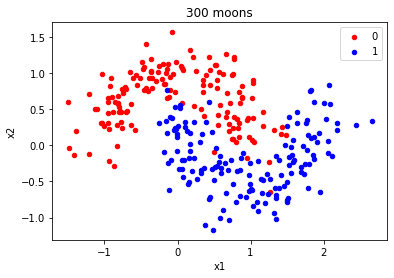

In [3]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

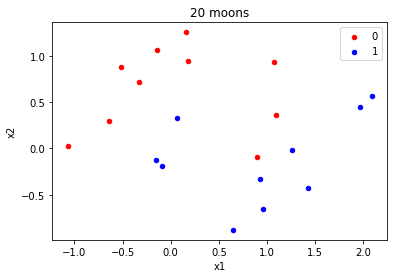

In [24]:
X, y = make_moons(n_samples=20, noise=0.2, random_state=0)
plot_moons(X, y)


❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [21]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(175, 2)

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [22]:
model = models.Sequential()

model.add(layers.Dense(5,activation='relu', input_dim=2))

model.add(layers.Dense(1,activation='sigmoid'))

In [23]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    

    model = models.Sequential()

    model.add(layers.Dense(5,activation='relu', input_dim=2))

    model.add(layers.Dense(1,activation='sigmoid'))

    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [61]:
model.fit(X_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.4686
Epoch 2/40
6/6 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.4800
Epoch 3/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.4857
Epoch 4/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.4914
Epoch 5/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6599 - accuracy: 0.5029
Epoch 6/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.5143
Epoch 7/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6492 - accuracy: 0.5200
Epoch 8/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.5314
Epoch 9/40
6/6 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.5486
Epoch 10/40
6/6 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.5600
Epoch 11/40
6/6 [======================

👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [43]:
history = model.history.history
history = pd.DataFrame(history, columns=['loss','accuracy'])
history['epoch'] = history.index
history = history.set_index('epoch')
history

,loss,accuracy
epoch,,
0,0.753054,0.388571
1,0.745082,0.394286
2,0.737652,0.405714
3,0.730221,0.417143
4,0.723360,0.422857
5,0.716282,0.434286
6,0.709384,0.440000
7,0.702995,0.440000
8,0.696492,0.457143


❓ Plot the history of the train loss using the following function ❓

In [63]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

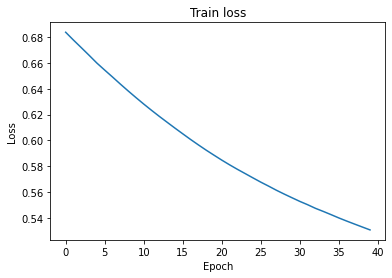

In [64]:
plot_history(model.history)

❓ What do you observe ❓

> Loss diminue avec nb d'époch

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [72]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [73]:
accuracy = model.evaluate(X_test,y_test)[1]

3/3 [==============================] - 0s 4ms/step - loss: 0.5372 - accuracy: 0.8000


**🧪 Test your code**

In [67]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.7.15, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/tests, inifile:
plugins: typeguard-2.7.1
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

=========================== 1 passed in 0.03 seconds ===========================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

1787/1787 [==============================] - 2s 1ms/step


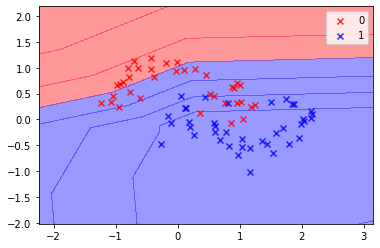

In [80]:
from utils.plots import plot_decision_regions

plot_decision_regions(X_test,y_test,classifier = model)

In [ ]:
# YOUR CODE HERE

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Epoch 1/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9756 - accuracy: 0.1943
Epoch 2/500
6/6 [==============================] - 0s 4ms/step - loss: 0.9656 - accuracy: 0.1943
Epoch 3/500
6/6 [==============================] - 0s 3ms/step - loss: 0.9549 - accuracy: 0.2057
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9451 - accuracy: 0.2000
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9353 - accuracy: 0.2057
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.9256 - accuracy: 0.2057
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.2057
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9071 - accuracy: 0.2057
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.8987 - accuracy: 0.2057
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.8900 - accuracy: 0.2000
Epoch 11/500
6/6 [===========

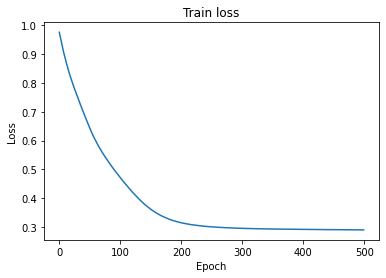

In [81]:
model = initialize_model()
model.fit(X_train,y_train,epochs=500)
plot_history(model.history)

❓ Did the test accuracy improve? ❓

In [83]:
#Not really

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [89]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   

    model = models.Sequential()
    model.add(layers.Dense(20,activation='relu',input_dim=2))
    model.add(layers.Dense(10,activation='relu'))
    model.add(layers.Dense(5,activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

Epoch 1/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.6171
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7714
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.7771
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.7829
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.7829
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.7829
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6250 - accuracy: 0.8057
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6164 - accuracy: 0.8229
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.8171
Epoch 10/500
6/6 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.8171
Epoch 11/500
6/6 [===========

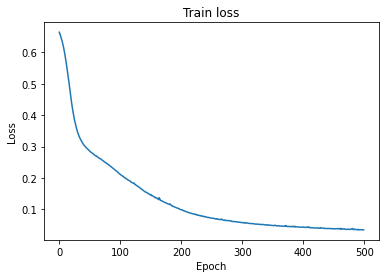

In [91]:
model = initialize_model_2()
model.fit(X_train,y_train,epochs=500)
plot_history(model.history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [92]:
accuracy_deep = model.evaluate(X_test,y_test)[1]

3/3 [==============================] - 0s 3ms/step - loss: 0.2149 - accuracy: 0.9333


🧪 **Test your code**

In [94]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.7.15, pytest-3.6.4, py-1.11.0, pluggy-0.7.1 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content/tests, inifile:
plugins: typeguard-2.7.1
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

=========================== 1 passed in 0.04 seconds ===========================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1787/1787 [==============================] - 2s 1ms/step


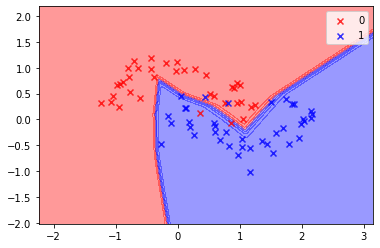

In [95]:
plot_decision_regions(X_test,y_test,model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!